In [3]:
import logging

import astropy as ast

import numpy as np
import pickle

import scarlet
import scarlet.display

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [4]:
def make_array_with_background(nsizearray,background):
    myarray = np.zeros(nsizearray) + background
    return myarray

In [5]:
def my_gaussian(x, y, meanx, meany, sigma):
    gaussian = ((1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-meanx)**2/(2*sigma**2))) * (1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(y-meany)**2/(2*sigma**2))))
    return gaussian

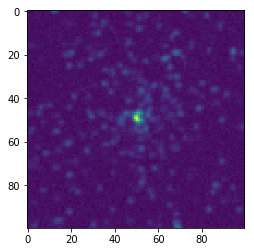

In [7]:
#Creates empty nx by ny array
nx , ny = 100 , 100
image = np.zeros((ny , nx))

#Sets number of stars
n = 1000

np.random.seed(5)
#Sets random positions
r = np.random.random(n) * nx
theta = np.random.uniform(0., 2. * np.pi, n)

#Creates random fluxes
f = np.random.random(n) ** 2

#Computes the random positions
x = nx / 2 + r * np.cos(theta)
y = ny / 2 + r * np.sin(theta)

with open('data.pickle', 'wb') as file_obj:
    pickle.dump((image, x, y, f), file_obj)

#Adding 'stars' over the array
for i in range(n):
    if x[i]>=0 and x[i]<=nx and y[i] >= 0 and y[i] < ny:
        image[int(y[i]), int(x[i])] += f[i]

#Makes each star a gaussian
image = gaussian_filter(image, 1)        
#image = my_gaussian(nx,ny,x,y,1)

#Adds noise
image += np.random.normal(3., 0.01, image.shape)
np.save("fake1.npy" , image)
#Shows image
plt.imshow(image, interpolation='nearest')
plt.savefig('fake1.jpeg')
plt.show()